In [16]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.


In [322]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
import squarify

In [323]:
#Data available at https://data.london.gov.uk/dataset/recorded_crime_summary
data = pd.read_csv('C:/Users/MPS Borough Level Crime (most recent 24 months).csv')

In [324]:
#Take a first look at the data
data.head()

,MajorText,MinorText,LookUp_BoroughName,201909,201910,201911,201912,202001,202002,202003,...,202011,202012,202101,202102,202103,202104,202105,202106,202107,202108
0,Arson and Criminal Damage,Arson,Barking and Dagenham,6,9,8,6,4,5,6,...,4,2,4,6,4,6,6,5,4,12
1,Arson and Criminal Damage,Criminal Damage,Barking and Dagenham,109,109,97,122,97,103,107,...,100,109,100,104,80,101,128,143,131,146
2,Burglary,Burglary - Business and Community,Barking and Dagenham,37,30,30,26,31,17,28,...,18,25,20,18,14,12,30,24,20,29
3,Burglary,Burglary - Residential,Barking and Dagenham,80,97,114,130,116,123,97,...,90,91,70,90,71,75,81,66,60,86
4,Drug Offences,Drug Trafficking,Barking and Dagenham,7,9,14,3,17,6,6,...,17,13,12,10,8,8,9,4,4,8


In [325]:
#Check the shape 
data.shape

(1558, 27)

In [326]:
#Rename some column labels to make them clearer to work with
data = data.rename({'MajorText': 'CrimeCategory', 'MinorText': 'Crime', 'LookUp_BoroughName': 'Borough'}, axis=1)

In [12]:
data.describe

<bound method NDFrame.describe of                     CrimeCategory                               Crime  \
0       Arson and Criminal Damage                               Arson   
1       Arson and Criminal Damage                     Criminal Damage   
2                        Burglary   Burglary - Business and Community   
3                        Burglary              Burglary - Residential   
4                   Drug Offences                    Drug Trafficking   
...                           ...                                 ...   
1553             Vehicle Offences          Theft from a Motor Vehicle   
1554             Vehicle Offences  Theft or Taking of a Motor Vehicle   
1555  Violence Against the Person                            Homicide   
1556  Violence Against the Person                Violence with Injury   
1557  Violence Against the Person             Violence without Injury   

                   Borough  201909  201910  201911  201912  202001  202002  \
0     Barki

In [327]:
#Check for any missing values
data.isnull().sum()

CrimeCategory    0
Crime            0
Borough          0
201909           0
201910           0
201911           0
201912           0
202001           0
202002           0
202003           0
202004           0
202005           0
202006           0
202007           0
202008           0
202009           0
202010           0
202011           0
202012           0
202101           0
202102           0
202103           0
202104           0
202105           0
202106           0
202107           0
202108           0
dtype: int64

In [ ]:
#No missing values which is what we should expect from .gov data

C:\Users\A621096\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


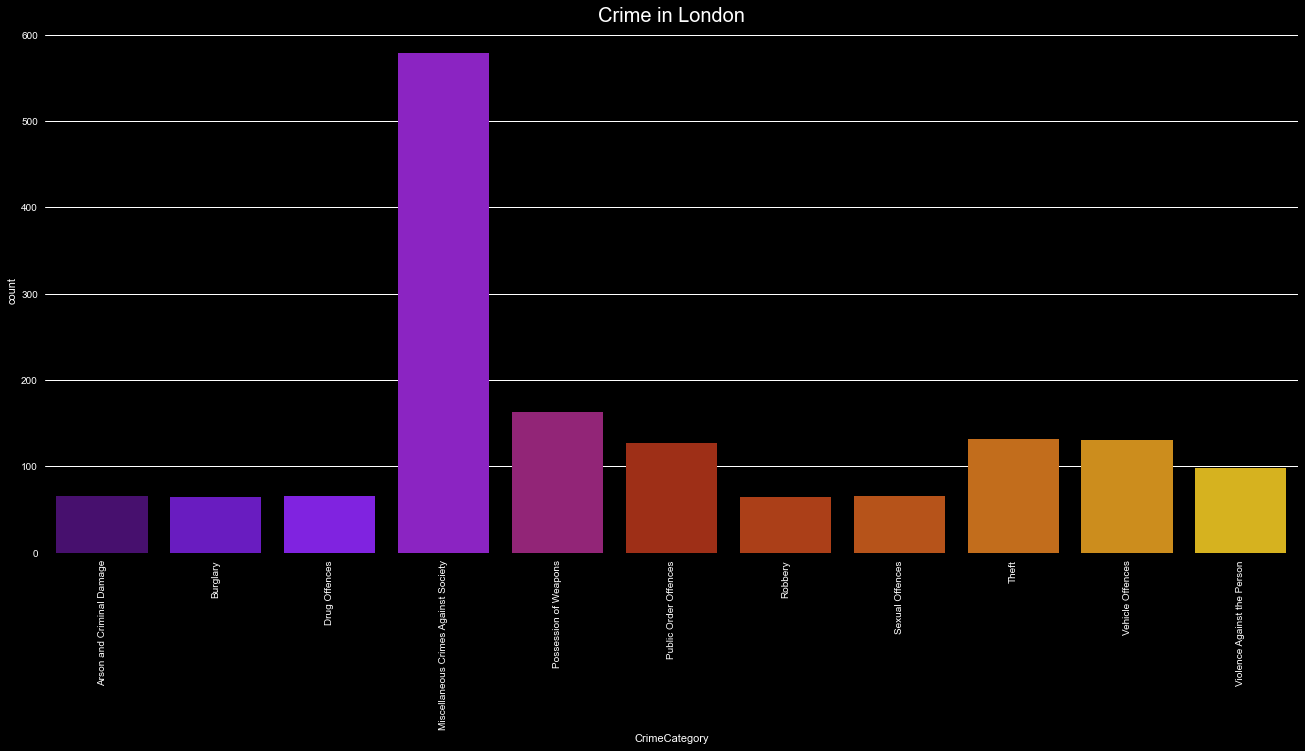

In [328]:
#What are the categories of crime? Lets see which categories are most heavily reported
plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('dark_background')

sns.countplot(data['CrimeCategory'], palette = 'gnuplot')

plt.title('Crime in London', fontweight = 30, fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

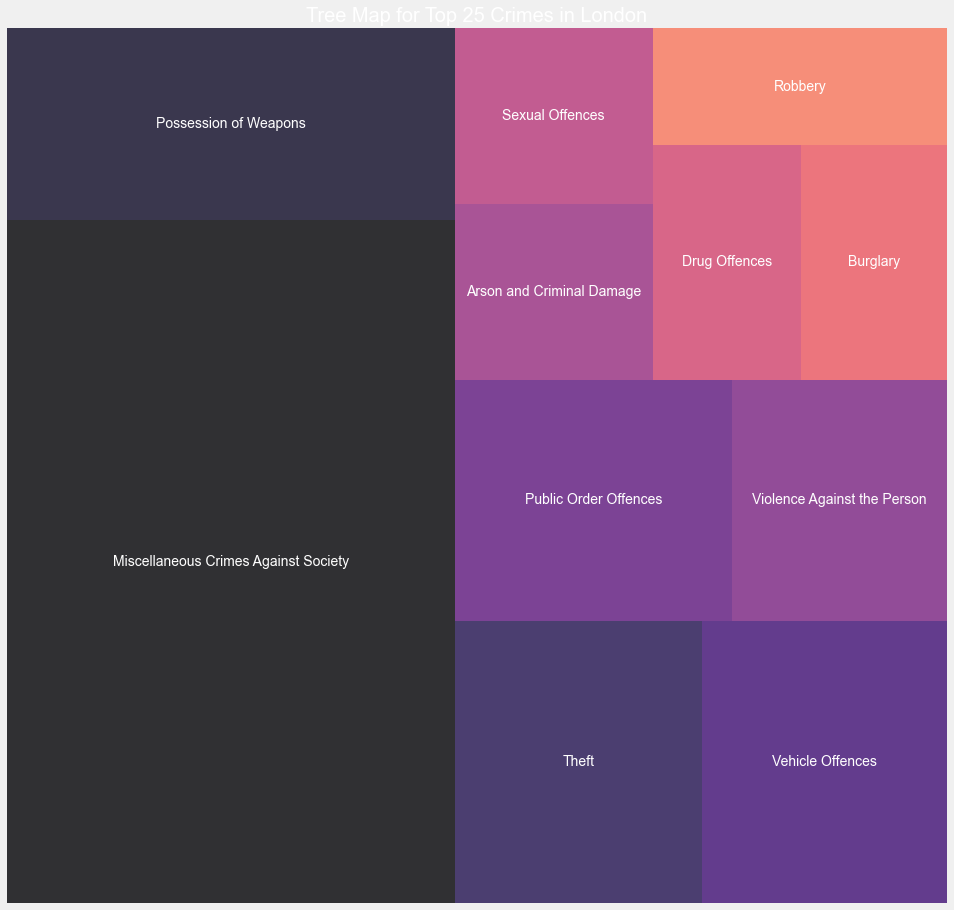

In [329]:
#The same data van be viewed in the flag type format
y = data['CrimeCategory'].value_counts().head(25)
    
plt.rcParams['figure.figsize'] = (15, 15)
plt.style.use('fivethirtyeight')

color = plt.cm.magma(np.linspace(0, 1, 15))
squarify.plot(sizes = y.values, label = y.index, alpha=.8, color = color)
plt.title('Tree Map for Top 25 Crimes in London', fontsize = 20)

plt.axis('off')
plt.show()

In [ ]:
#Having examined the most frequent types of crime, it would be interesting to know where these crimes take place

In [330]:
#First we need to sum the columns to get a total number of crimes for the period
data['TotalForPeriod'] = data.sum(axis = 1)

In [ ]:
# Then we need to group by the borough so we can graph each borough's crime numbers

In [331]:
data2 = data.groupby(['Borough'], as_index=False, axis = 0 ).sum()

In [332]:
data2.head()

,Borough,201909,201910,201911,201912,202001,202002,202003,202004,202005,...,202012,202101,202102,202103,202104,202105,202106,202107,202108,TotalForPeriod
0,Barking and Dagenham,1650,1794,1658,1655,1677,1582,1800,1275,1453,...,1484,1401,1436,1582,1642,1698,1785,1743,1650,38930
1,Barnet,2619,2633,2835,2605,2654,2592,2300,1660,1995,...,2158,1842,1888,2482,2237,2423,2480,2250,2171,55873
2,Bexley,1493,1674,1537,1405,1624,1462,1285,913,1227,...,1182,1076,1013,1258,1145,1225,1260,1268,1279,31226
3,Brent,2569,2666,2510,2427,2518,2392,2276,2034,2263,...,2267,1928,2075,2253,2094,2438,2386,2639,2481,57247
4,Bromley,2126,2229,2295,2093,2157,2074,1769,1444,1647,...,1671,1497,1585,1836,1840,1890,1842,1928,1726,44913


In [333]:
height = data2['TotalForPeriod']
bars = data2['Borough']
y_pos = np.arange(len(bars))

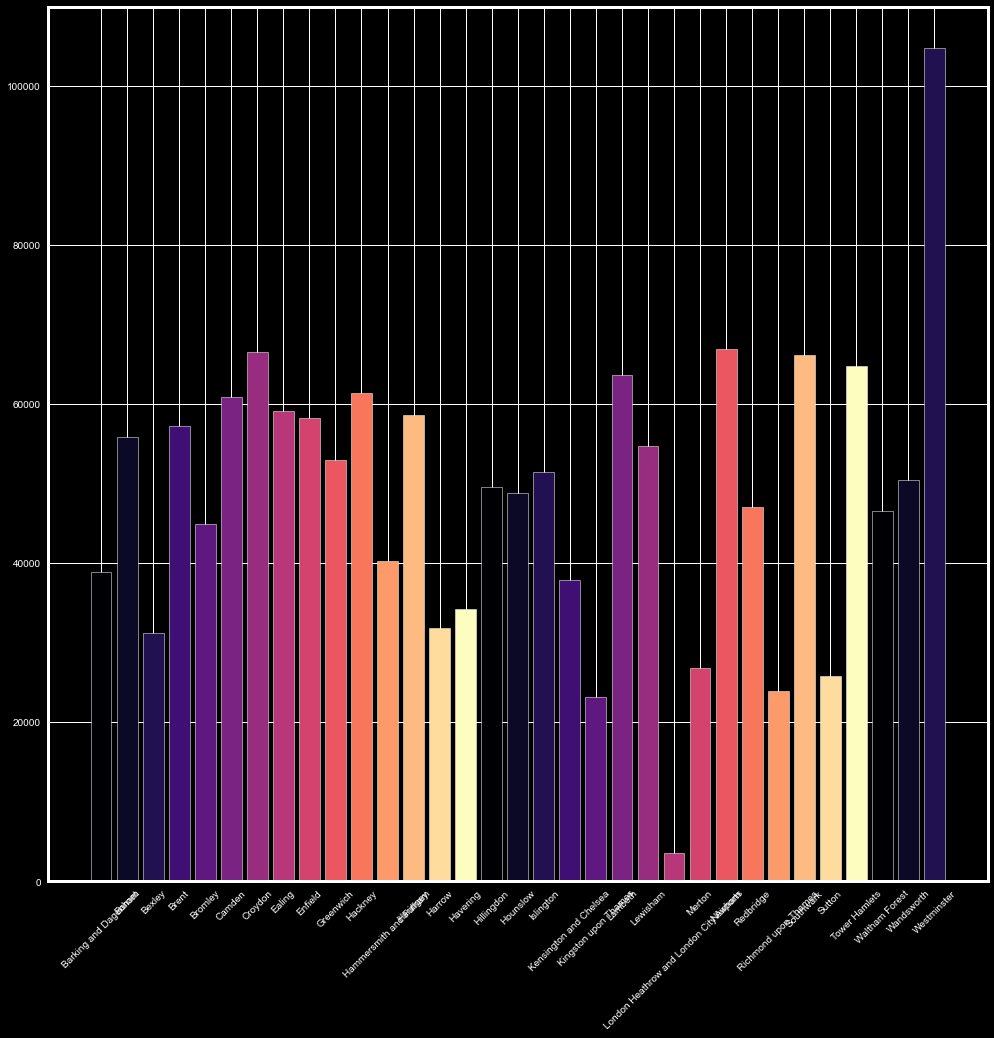

In [338]:
#Plot Total Crime reported for each Borough
color = plt.cm.magma(np.linspace(0, 1, 15))
plt.bar(y_pos, height, color = color, edgecolor="white")
plt.xticks(y_pos, bars)
plt.xticks(rotation = 45)

plt.show()

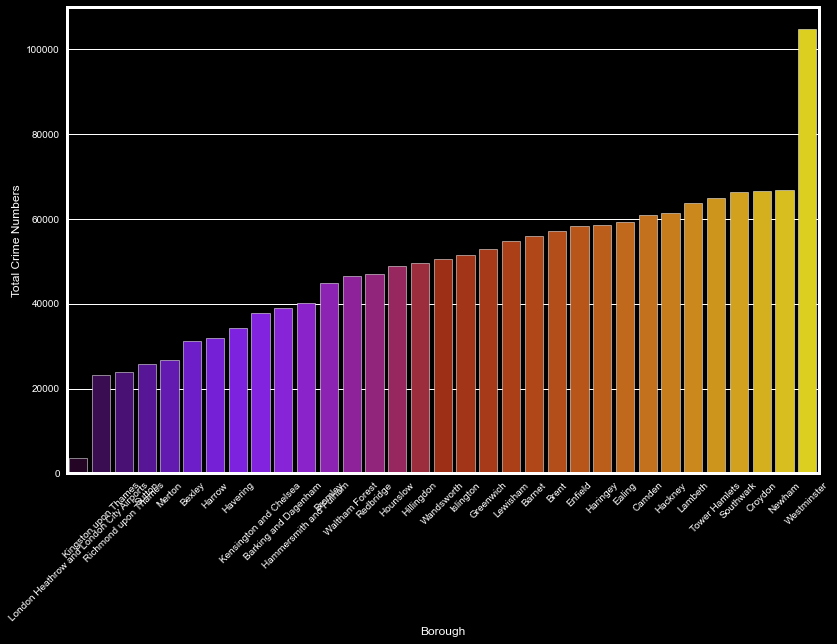

In [337]:
#Lets plot the same data but sorted in ascending order by Total Crime
plt.style.use('dark_background')
plt.figure(figsize=(12,8))
sns.barplot(x="Borough", y="TotalForPeriod", data=data2.sort_values(by = 'TotalForPeriod'), palette='gnuplot',edgecolor="white")
plt.ylabel('Total Crime Numbers', fontsize=12)
plt.xlabel('Borough', fontsize=12)
plt.xticks(rotation='45')
plt.show()

In [ ]:
#We can see that Westminster experiences the highest reported Crime rate, with double that of the median value

In [ ]:
#It may be more interesting to see the breakdown of crime for each of the Boroughs, we know the total crime rates, but is the rate of crime similar accross all categories?

In [339]:
data_sorted = data.sort_values('TotalForPeriod')

In [340]:
data3 = data_sorted[['CrimeCategory','Borough','TotalForPeriod']]

In [342]:
data3 = data_sorted.pivot_table(
        values='TotalForPeriod', index='CrimeCategory', columns='Borough',
        fill_value=0, aggfunc='sum')

In [343]:
data3

Borough,Barking and Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,Greenwich,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
CrimeCategory,,,,,,,,,,,,,,,,,,,,,
Arson and Criminal Damage,2769,3765,2938,4089,3632,3154,4920,4082,3815,4022,...,2034,4149,2936,1878,3882,1983,4121,3165,3178,4266
Burglary,2530,5610,2101,4231,3672,4513,4690,4431,4979,3386,...,2086,3669,3499,2525,5169,2052,5543,3433,4841,6200
Drug Offences,3095,2170,1688,4195,2356,3616,5100,3837,2639,3649,...,1676,5523,3171,1012,4672,1371,5615,3264,2558,6625
Miscellaneous Crimes Against Society,648,752,503,795,699,542,1018,969,837,906,...,443,941,608,291,720,376,892,608,654,1247
Possession of Weapons,350,301,218,502,307,330,692,418,447,475,...,193,606,329,97,634,189,505,397,324,663
Public Order Offences,2490,3837,2521,4208,3380,3995,4775,4448,3753,4214,...,2053,4243,2777,1657,4363,1859,4759,2960,3627,6416
Robbery,1411,1827,556,1944,887,2608,1863,1677,2390,1452,...,762,2983,1423,482,3192,496,2195,1509,1556,4726
Sexual Offences,1284,1225,762,1264,1027,1254,2071,1527,1424,1567,...,674,1755,1129,588,1588,666,1661,1040,1360,2067
Theft,6464,10340,4514,9840,8547,21927,10012,9943,9103,9193,...,4852,16445,9228,5086,18587,4173,14612,9349,11081,45951


In [345]:
Boroughs = data['Borough'].unique()

In [346]:
data3 = data3[data3.sum().sort_values(ascending = False).index]

In [347]:
Boroughs = data3.columns
CriminalDamage = data3.iloc[0]
Burglary = data3.iloc[1]
DrugOffences = data3.iloc[2]
Miscellaneous = data3.iloc[3]
PossesionOfWeapons = data3.iloc[4]

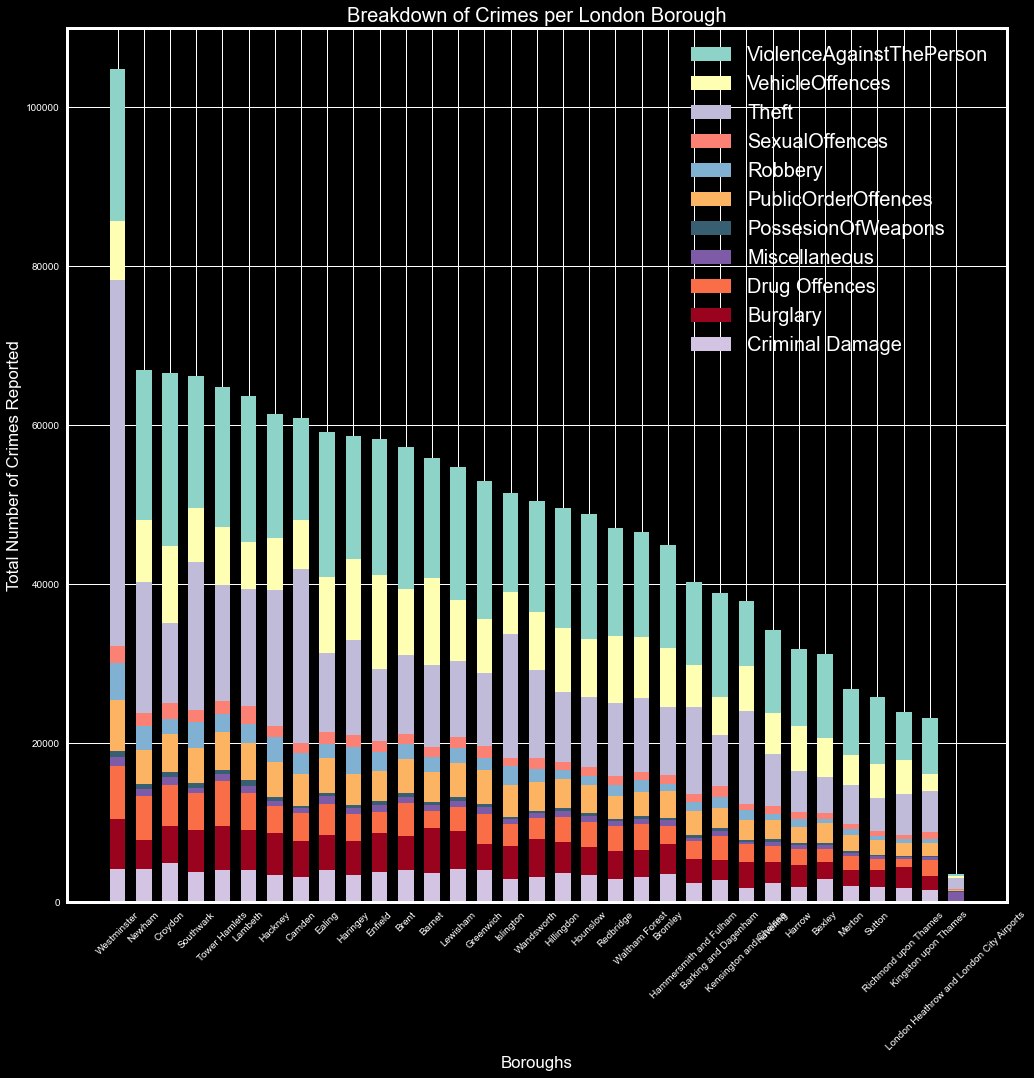

In [349]:
Boroughs = data3.columns
CriminalDamage = data3.iloc[0]
Burglary = data3.iloc[1]
DrugOffences = data3.iloc[2]
Miscellaneous = data3.iloc[3]
PossesionOfWeapons = data3.iloc[4]
PublicOrderOffences = data3.iloc[5]
Robbery = data3.iloc[6]
SexualOffences = data3.iloc[7]
Theft = data3.iloc[8]
VehicleOffences = data3.iloc[9]
ViolenceAgainstThePerson = data3.iloc[10]
ind = [x for x, _ in enumerate(Boroughs)]

plt.bar(ind, ViolenceAgainstThePerson, width=0.6, label='ViolenceAgainstThePerson', bottom=CriminalDamage+Burglary+DrugOffences+Miscellaneous+PossesionOfWeapons+PublicOrderOffences+Robbery+SexualOffences+Theft+VehicleOffences)
plt.bar(ind, VehicleOffences, width=0.6, label='VehicleOffences', bottom=CriminalDamage+Burglary+DrugOffences+Miscellaneous+PossesionOfWeapons+PublicOrderOffences+Robbery+SexualOffences+Theft)
plt.bar(ind, Theft, width=0.6, label='Theft', bottom=CriminalDamage+Burglary+DrugOffences+Miscellaneous+PossesionOfWeapons+PublicOrderOffences+Robbery+SexualOffences)
plt.bar(ind, SexualOffences, width=0.6, label='SexualOffences', bottom=CriminalDamage+Burglary+DrugOffences+Miscellaneous+PossesionOfWeapons+PublicOrderOffences+Robbery)
plt.bar(ind, Robbery, width=0.6, label='Robbery', bottom=CriminalDamage+Burglary+DrugOffences+Miscellaneous+PossesionOfWeapons+PublicOrderOffences)
plt.bar(ind, PublicOrderOffences, width=0.6, label='PublicOrderOffences', bottom=CriminalDamage+Burglary+DrugOffences+Miscellaneous+PossesionOfWeapons)
plt.bar(ind, PossesionOfWeapons, width=0.6, label='PossesionOfWeapons', color='#385F71', bottom=CriminalDamage+Burglary+DrugOffences+Miscellaneous)
plt.bar(ind, Miscellaneous, width=0.6, label='Miscellaneous', color='#7D5BA6', bottom=CriminalDamage+Burglary+DrugOffences)
plt.bar(ind, DrugOffences, width=0.6, label='Drug Offences', color='#F96E46', bottom=CriminalDamage+Burglary)
plt.bar(ind, Burglary, width=0.6, label='Burglary', color='#9A031E', bottom=CriminalDamage)
plt.bar(ind, CriminalDamage, width=0.6, label='Criminal Damage', color='#D3C4E3')

plt.xticks(ind, Boroughs)
plt.ylabel("Total Number of Crimes Reported")
plt.xlabel("Boroughs")
plt.legend(loc="upper right", prop={'size':20})
plt.xticks(rotation='45')
plt.title("Breakdown of Crimes per London Borough", fontsize=20)

plt.show()

In [ ]:
#We can see that accross all Boroughs, Theft appears to dominate the crime rate, along with Violence Against the Person. An easier way to view this would be to see the categories as a propertion of total crime

In [350]:
#Create Proportion DFs
Total = CriminalDamage + Burglary + DrugOffences + Miscellaneous + PossesionOfWeapons + PublicOrderOffences + Robbery + SexualOffences + Theft + VehicleOffences + ViolenceAgainstThePerson

p_CriminalDamage = np.true_divide(CriminalDamage, Total) * 100
p_Burglary = np.true_divide(Burglary, Total) * 100
p_DrugOffences = np.true_divide(DrugOffences, Total) * 100
p_Miscellaneous = np.true_divide(Miscellaneous, Total) * 100
p_PossesionOfWeapons = np.true_divide(PossesionOfWeapons, Total) * 100
p_PublicOrderOffences = np.true_divide(PublicOrderOffences, Total) * 100
p_Robbery = np.true_divide(Robbery, Total) * 100
p_SexualOffences = np.true_divide(SexualOffences, Total) * 100
p_Theft = np.true_divide(Theft, Total) * 100
p_VehicleOffences = np.true_divide(VehicleOffences, Total) * 100
p_ViolenceAgainstThePerson = np.true_divide(ViolenceAgainstThePerson, Total) * 100

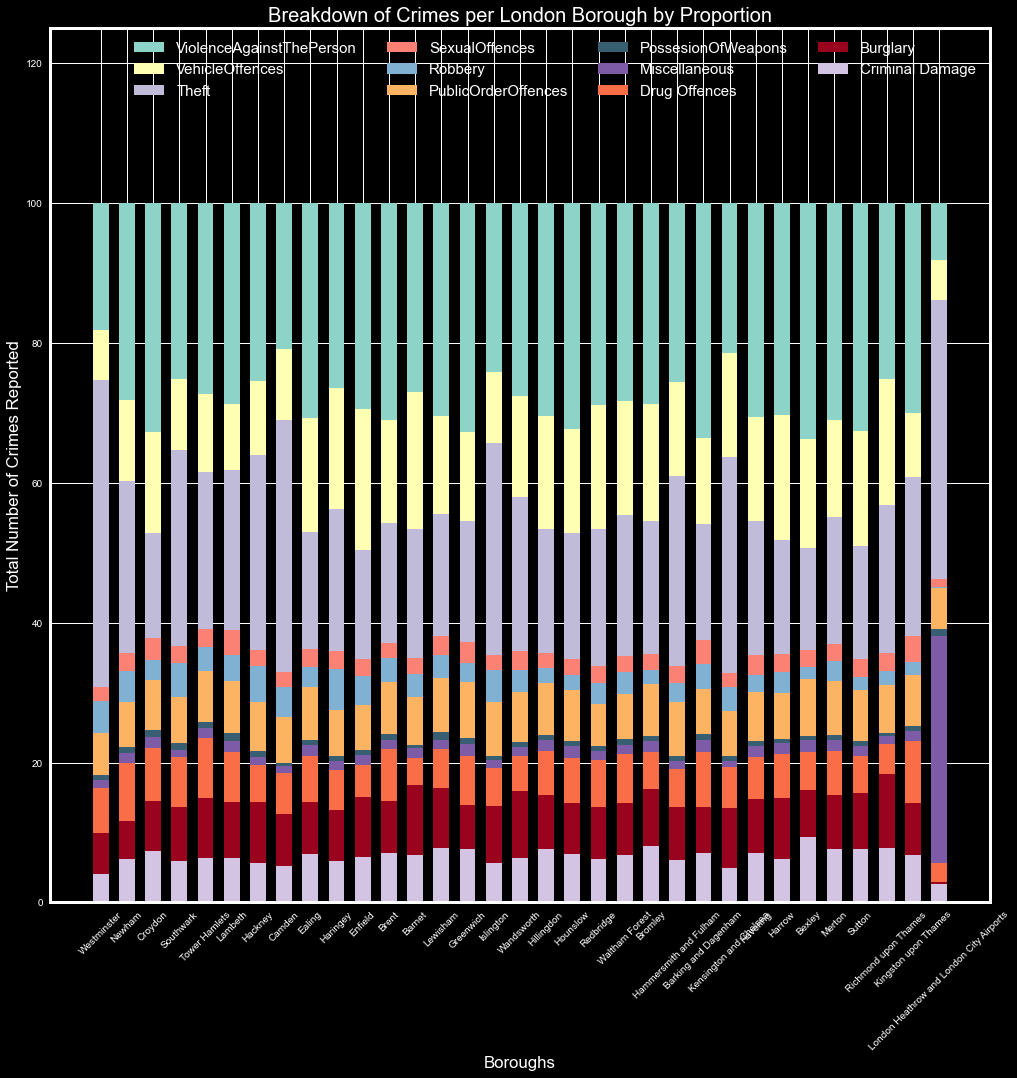

In [351]:
#We can now plot the chart
plt.bar(ind, p_ViolenceAgainstThePerson, width=0.6, label='ViolenceAgainstThePerson', bottom=p_CriminalDamage+p_Burglary+p_DrugOffences+p_Miscellaneous+p_PossesionOfWeapons+p_PublicOrderOffences+p_Robbery+p_SexualOffences+p_Theft+p_VehicleOffences)
plt.bar(ind, p_VehicleOffences, width=0.6, label='VehicleOffences', bottom=p_CriminalDamage+p_Burglary+p_DrugOffences+p_Miscellaneous+p_PossesionOfWeapons+p_PublicOrderOffences+p_Robbery+p_SexualOffences+p_Theft)
plt.bar(ind, p_Theft, width=0.6, label='Theft', bottom=p_CriminalDamage+p_Burglary+p_DrugOffences+p_Miscellaneous+p_PossesionOfWeapons+p_PublicOrderOffences+p_Robbery+p_SexualOffences)
plt.bar(ind, p_SexualOffences, width=0.6, label='SexualOffences', bottom=p_CriminalDamage+p_Burglary+p_DrugOffences+p_Miscellaneous+p_PossesionOfWeapons+p_PublicOrderOffences+p_Robbery)
plt.bar(ind, p_Robbery, width=0.6, label='Robbery', bottom=p_CriminalDamage+p_Burglary+p_DrugOffences+p_Miscellaneous+p_PossesionOfWeapons+p_PublicOrderOffences)
plt.bar(ind, p_PublicOrderOffences, width=0.6, label='PublicOrderOffences', bottom=p_CriminalDamage+p_Burglary+p_DrugOffences+p_Miscellaneous+p_PossesionOfWeapons)
plt.bar(ind, p_PossesionOfWeapons, width=0.6, label='PossesionOfWeapons', color='#385F71', bottom=p_CriminalDamage+p_Burglary+p_DrugOffences+p_Miscellaneous)
plt.bar(ind, p_Miscellaneous, width=0.6, label='Miscellaneous', color='#7D5BA6', bottom=p_CriminalDamage+p_Burglary+p_DrugOffences)
plt.bar(ind, p_DrugOffences, width=0.6, label='Drug Offences', color='#F96E46', bottom=p_CriminalDamage+p_Burglary)
plt.bar(ind, p_Burglary, width=0.6, label='Burglary', color='#9A031E', bottom=p_CriminalDamage)
plt.bar(ind, p_CriminalDamage, width=0.6, label='Criminal Damage', color='#D3C4E3')

plt.xticks(ind, Boroughs)
plt.ylim([0, 125])
plt.ylabel("Total Number of Crimes Reported")
plt.xlabel("Boroughs")
plt.legend(loc="upper right",ncol=4, prop={'size':15})
plt.xticks(rotation='45')
plt.title("Breakdown of Crimes per London Borough by Proportion",fontsize=20)

plt.show()

In [ ]:
#With this view we can see that actually Violence against the Person dominates most London Borough crime statistics.
#The exception, understandably, is London Heathrow and London City Airports. This 'Borough' has an entirely different break down of crime compared to the rest of London. 

In [ ]:
#How does the crime rate change over time?

In [353]:
data4 = data2.transpose()

In [354]:
data4.reset_index()

,index,0,1,2,3,4,5,6,7,8,...,23,24,25,26,27,28,29,30,31,32
0,Borough,Barking and Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
1,201909,1650,2619,1493,2569,2126,3353,2895,2648,2551,...,1226,2832,2012,1034,3398,1117,2777,2057,2224,6388
2,201910,1794,2633,1674,2666,2229,3746,3076,2725,2676,...,1240,3326,2227,1110,3639,1200,3067,2103,2465,7217
3,201911,1658,2835,1537,2510,2295,3465,2987,2825,2808,...,1291,3062,2086,1200,3362,1213,3067,2097,2272,6855
4,201912,1655,2605,1405,2427,2093,3204,2778,2602,2547,...,1126,2844,1953,1096,3161,1133,2891,1905,2092,7484
5,202001,1677,2654,1624,2518,2157,3243,3066,2700,2605,...,1279,3032,2082,1150,2976,1360,2769,2086,2379,6404
6,202002,1582,2592,1462,2392,2074,3455,2914,2433,2482,...,1123,2906,2124,1021,3042,1205,2684,2105,2101,6687
7,202003,1800,2300,1285,2276,1769,2721,2993,2366,2367,...,1136,2595,1907,933,2448,1190,2505,1935,1843,4695
8,202004,1275,1660,913,2034,1444,1644,2251,1998,1862,...,893,2074,1488,719,1845,868,1916,1688,1413,1709
9,202005,1453,1995,1227,2263,1647,1867,2508,2301,2213,...,1002,2333,1730,971,2231,1018,2290,1925,1807,2266


In [355]:
data4.columns = data4.iloc[0]
data4 = data4.iloc[1: , :]

In [356]:
data4 = data4.rename(columns={'Borough': 'YearMonth'})

In [357]:
data4 = data4.reset_index()

In [358]:
data4 = data4.rename({'index': 'YearMonth'}, axis=1)
data4 = data4.drop([data4.index[24]])

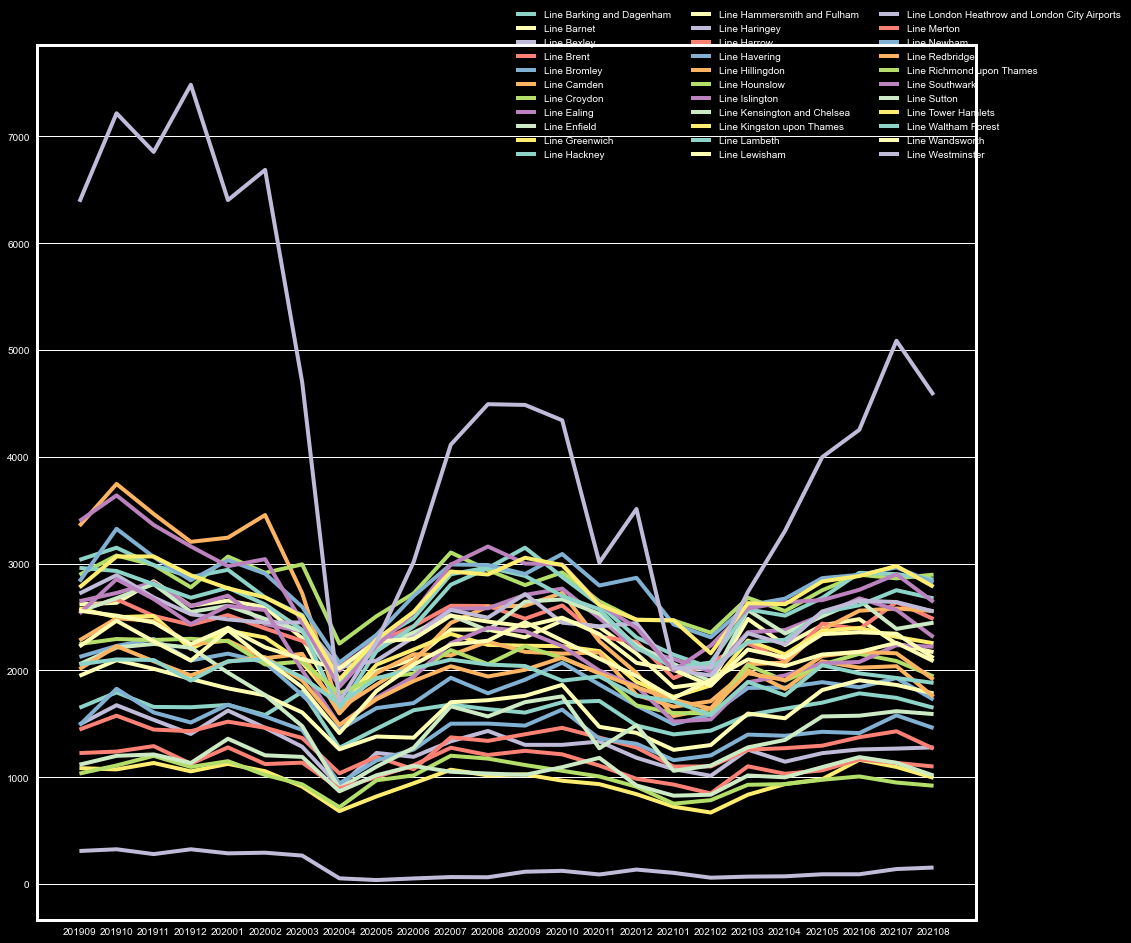

In [359]:
for col in data4.columns:
    if not col == 'YearMonth':
        plt.plot(data4['YearMonth'], data4[col], label='Line '+col)

plt.legend(loc='upper left', bbox_to_anchor=(0.5, 1.05),
          ncol=3 )
plt.grid(axis='x')
plt.show()

In [ ]:
#Understandably, all boroughs appear to have a dip in crime in April of 2020, coinciding with the first Covid-19 Lockdown.
#Interestingly, crime in Westiminster appears to be more volatile that neighbouring boroughs

In [ ]:
#Lets now take four Boroughs and assess the trends of crime categories within each. We will use Westiminster because of the abnormal pattern above, along with three boroughs chosen at random; Camden, Merton and Wandsworth

In [257]:
Westminster = data[(data['Borough']=='Westminster')]
Westminster = Westminster.drop(['Crime','Borough','TotalForPeriod'], axis = 1)
Westminster = Westminster.groupby(['CrimeCategory'], as_index=False, axis = 0 ).sum()
Westminster = Westminster.transpose()
Westminster.columns = Westminster.iloc[0]
Westminster = Westminster.reset_index()
Westminster = Westminster.rename({'index': 'YearMonth'}, axis=1)
Westminster = Westminster.drop([Westminster.index[0]])

In [260]:
Camden = data[(data['Borough']=='Camden')]
Camden = Camden.drop(['Crime','Borough','TotalForPeriod'], axis = 1)
Camden = Camden.groupby(['CrimeCategory'], as_index=False, axis = 0 ).sum()
Camden = Camden.transpose()
Camden.columns = Camden.iloc[0]
Camden = Camden.reset_index()
Camden = Camden.rename({'index': 'YearMonth'}, axis=1)
Camden = Camden.drop([Camden.index[0]])

In [261]:
Wandsworth = data[(data['Borough']=='Wandsworth')]
Wandsworth = Wandsworth.drop(['Crime','Borough','TotalForPeriod'], axis = 1)
Wandsworth = Wandsworth.groupby(['CrimeCategory'], as_index=False, axis = 0 ).sum()
Wandsworth = Wandsworth.transpose()
Wandsworth.columns = Wandsworth.iloc[0]
Wandsworth = Wandsworth.reset_index()
Wandsworth = Wandsworth.rename({'index': 'YearMonth'}, axis=1)
Wandsworth = Wandsworth.drop([Wandsworth.index[0]])

In [262]:
Merton = data[(data['Borough']=='Merton')]
Merton = Merton.drop(['Crime','Borough','TotalForPeriod'], axis = 1)
Merton = Merton.groupby(['CrimeCategory'], as_index=False, axis = 0 ).sum()
Merton = Merton.transpose()
Merton.columns = Merton.iloc[0]
Merton = Merton.reset_index()
Merton = Merton.rename({'index': 'YearMonth'}, axis=1)
Merton = Merton.drop([Merton.index[0]])

In [ ]:
#Westminster, Camden, Wandsworth and Merton

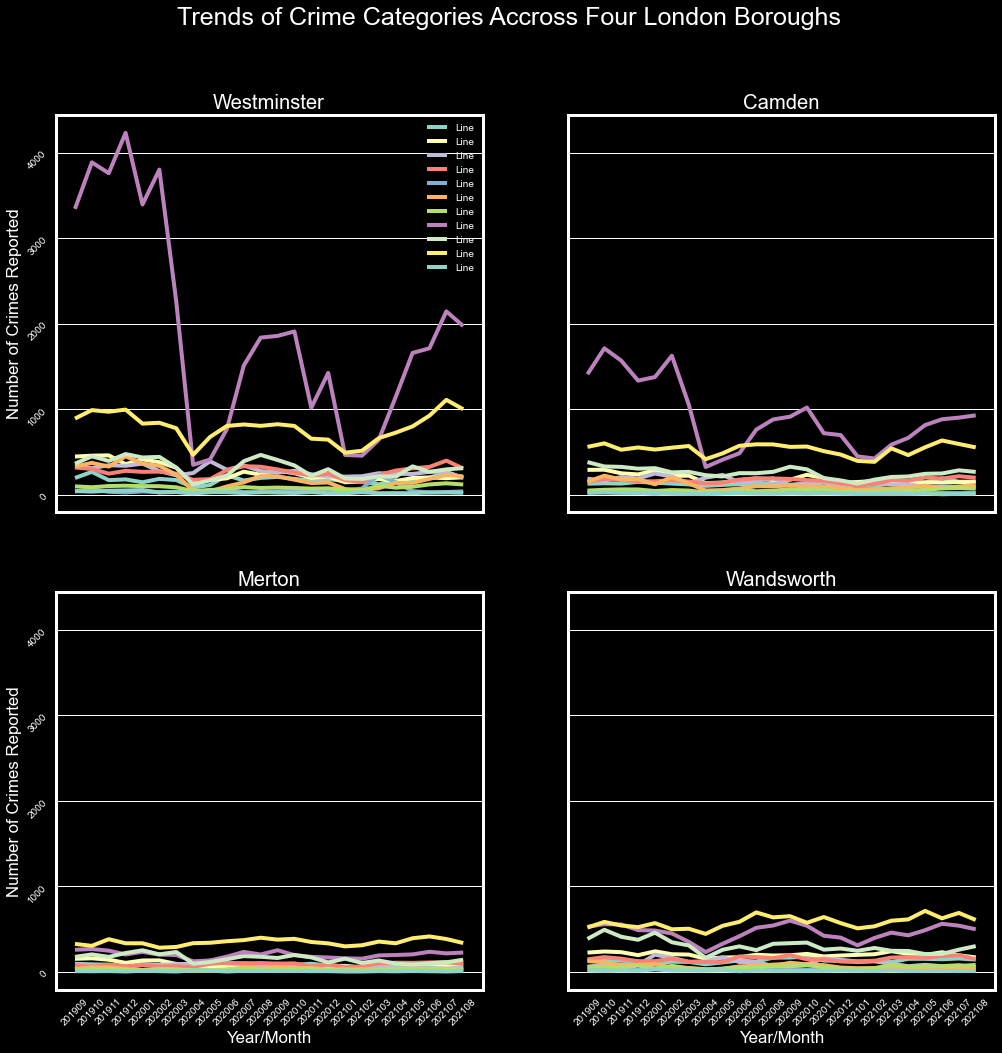

In [367]:
#Plot the four line graphs
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True)
axs[0, 0].plot('YearMonth', 'Arson and Criminal Damage',data=Westminster,label='Line')
axs[0, 0].plot('YearMonth', 'Burglary',data=Westminster,label='Line')
axs[0, 0].plot('YearMonth', 'Drug Offences',data=Westminster,label='Line')
axs[0, 0].plot('YearMonth', 'Public Order Offences',data=Westminster,label='Line')
axs[0, 0].plot('YearMonth', 'Miscellaneous Crimes Against Society',data=Westminster,label='Line')
axs[0, 0].plot('YearMonth', 'Robbery',data=Westminster,label='Line')
axs[0, 0].plot('YearMonth', 'Sexual Offences',data=Westminster,label='Line')
axs[0, 0].plot('YearMonth', 'Theft',data=Westminster,label='Line')
axs[0, 0].plot('YearMonth', 'Vehicle Offences',data=Westminster,label='Line')
axs[0, 0].plot('YearMonth', 'Violence Against the Person',data=Westminster,label='Line')
axs[0, 0].plot('YearMonth', 'Possession of Weapons',data=Westminster,label='Line')
axs[0, 0].set_title('Westminster')
axs[0, 0].legend(loc="upper right")
axs[0, 0].grid(axis='x')

#Camden
axs[0, 1].plot('YearMonth', 'Arson and Criminal Damage',data=Camden,label='Line')
axs[0, 1].plot('YearMonth', 'Burglary',data=Camden,label='Line')
axs[0, 1].plot('YearMonth', 'Drug Offences',data=Camden,label='Line')
axs[0, 1].plot('YearMonth', 'Public Order Offences',data=Camden,label='Line')
axs[0, 1].plot('YearMonth', 'Miscellaneous Crimes Against Society',data=Camden,label='Line')
axs[0, 1].plot('YearMonth', 'Robbery',data=Camden,label='Line')
axs[0, 1].plot('YearMonth', 'Sexual Offences',data=Camden,label='Line')
axs[0, 1].plot('YearMonth', 'Theft',data=Camden,label='Line')
axs[0, 1].plot('YearMonth', 'Vehicle Offences',data=Camden,label='Line')
axs[0, 1].plot('YearMonth', 'Violence Against the Person',data=Camden,label='Line')
axs[0, 1].plot('YearMonth', 'Possession of Weapons',data=Camden,label='Line')
axs[0, 1].set_title('Camden')
axs[0, 1].grid(axis='x')


axs[1, 1].plot('YearMonth', 'Arson and Criminal Damage',data=Wandsworth,label='Line')
axs[1, 1].plot('YearMonth', 'Burglary',data=Wandsworth,label='Line')
axs[1, 1].plot('YearMonth', 'Drug Offences',data=Wandsworth,label='Line')
axs[1, 1].plot('YearMonth', 'Public Order Offences',data=Wandsworth,label='Line')
axs[1, 1].plot('YearMonth', 'Miscellaneous Crimes Against Society',data=Wandsworth,label='Line')
axs[1, 1].plot('YearMonth', 'Robbery',data=Wandsworth,label='Line')
axs[1, 1].plot('YearMonth', 'Sexual Offences',data=Wandsworth,label='Line')
axs[1, 1].plot('YearMonth', 'Theft',data=Wandsworth,label='Line')
axs[1, 1].plot('YearMonth', 'Vehicle Offences',data=Wandsworth,label='Line')
axs[1, 1].plot('YearMonth', 'Violence Against the Person',data=Wandsworth,label='Line')
axs[1, 1].plot('YearMonth', 'Possession of Weapons',data=Wandsworth,label='Line')
axs[1, 1].grid(axis='x')
axs[1, 1].set_title('Wandsworth')

axs[1, 0].plot('YearMonth', 'Arson and Criminal Damage',data=Merton,label='Line')
axs[1, 0].plot('YearMonth', 'Burglary',data=Merton,label='Line')
axs[1, 0].plot('YearMonth', 'Drug Offences',data=Merton,label='Line')
axs[1, 0].plot('YearMonth', 'Public Order Offences',data=Merton,label='Line')
axs[1, 0].plot('YearMonth', 'Miscellaneous Crimes Against Society',data=Merton,label='Line')
axs[1, 0].plot('YearMonth', 'Robbery',data=Merton,label='Line')
axs[1, 0].plot('YearMonth', 'Sexual Offences',data=Merton,label='Line')
axs[1, 0].plot('YearMonth', 'Theft',data=Merton,label='Line')
axs[1, 0].plot('YearMonth', 'Vehicle Offences',data=Merton,label='Line')
axs[1, 0].plot('YearMonth', 'Violence Against the Person',data=Merton,label='Line')
axs[1, 0].plot('YearMonth', 'Possession of Weapons',data=Merton,label='Line')
axs[1, 0].grid(axis='x')
axs[1, 0].set_title('Merton')

fig.suptitle("Trends of Crime Categories Accross Four London Boroughs",fontsize = 25)

for ax in axs.flat:
    ax.set(xlabel='Year/Month', ylabel='Number of Crimes Reported')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
for ax in axs.flat:
    ax.tick_params(labelrotation=45)
    
    